# Python scientific libraries

> Setelah membaca ini, pembaca diharapkan dapat memahami penggunaan library [NumPy](https://numpy.org/doc/stable/user/quickstart.html), [Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html), dan [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) untuk pengolahan data.

## Mengapa menggunakan libraries?

Library diperlukan untuk memudahkan pemrosesan data sesuai dengan fokus spesifik yang diperlukan. 

Library python yang umum digunakan dalam pengolahan data meteorologi maritim.

| No | Library | Penggunaan |
| - | :- | - |
| 1 | NumPy | Manipulasi array |
| 2 | Pandas | manipulasi data tabular |
| 3 | Matplotlib | visualisasi data |
| | ---Tidak disampaikan dalam Mata Pelatihan 1, namun di Mata Pelatihan 2--- | 
| 4 | Xarray | manipulasi data multidimensi |
| 5 | Cartopy | visualisasi map |
| 6 | Geopandas | manipulasi data geospasial |

## NumPy

NumPy menyediakan dukungan untuk array, yang lebih efisien dan praktis daripada `list` Python untuk data numerik.

> Konsep: Membuat array, atribut array, operasi array dasar.

In [26]:
# Mengimport library
import numpy as np

### Creating NumPy array

In [44]:
# Create a one-dimensional array of integer
arr = np.array([1,2,3,4,5])
print(arr)

# Create a 2D array of floats
arr = np.array([[1.1, 2.3],[3.1,4.2]])
print(arr)

[1 2 3 4 5]
[[1.1 2.3]
 [3.1 4.2]]


### Indexing

In [46]:
# Indexing
# Create a 2D array
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [47]:
# Access the element in the first row, second column
selected = arr[0,1]
print(selected)

2


### Slicing

In [49]:
# Slicing
# Create 1D array
arr = np.arange(10)
print(arr)

# Access the FIRST 5 elements
print(arr[:5])

# Access the LAST 5 elements
print(arr[-5:])

# Access elements having even index
print(arr[::2])


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[5 6 7 8 9]
[0 2 4 6 8]


### Math operations

In [50]:
# Mathematical Operations
# Create 1D array
arr = np.array([1,2,3,4,5])
print(arr)

# Operation of adding the value of each element
print(arr+2)

# Operation of multiplication of each element
print(arr*3)

# Compute dot products of the array with itself
print(np.dot(arr,arr))

[1 2 3 4 5]
[3 4 5 6 7]
[ 3  6  9 12 15]
55


### Aggregation

In [51]:
# Aggregation Operations
# Create 1D array
arr = np.array([1,2,3,4,5])
print(arr)

# Finding max value
print(np.max(arr))

# Finding min value
print(np.min(arr))

# Finding standard deviation
print(np.std(arr))

[1 2 3 4 5]
5
1
1.4142135623730951


### Reshaping and Transposing

In [52]:
# Create 1D array
arr = np.array([1,2,3,4,5,6])
print(arr)

# Reshape the array into a 2D array
result = arr.reshape(2,3)
print(result)

# Transpose array
print(result.T)

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


## Pandas

In [27]:
# Mengimport library
import pandas as pd

### Series dan DataFrame

In [54]:
import pandas as pd

# Create a Series
s = pd.Series(
    [1, 3, 5, np.nan, 6, 8]
)
print(s)

df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})
print(df)

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]},
    index=['aba','abi','iba','abu', ]
)
print(df)

df.to_csv('Test.csv')

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
   A  B
0  1  5
1  2  6
2  3  7
3  4  8
     A  B
aba  1  5
abi  2  6
iba  3  7
abu  4  8


In [55]:
# Membuat dataframe
data = {'temp': [27,30,29],
        'rh': [70,75,80],
        'wx': ['clear','cloudy','rain']}

df = pd.DataFrame(data,index=['Jakarta','Tokyo','NewYork'])
df

,temp,rh,wx
Jakarta,27,70,clear
Tokyo,30,75,cloudy
NewYork,29,80,rain


In [38]:
df.describe()

,CH (mm/day)
count,3.000000
mean,52.333333
std,41.789153
min,22.000000
25%,28.500000
50%,35.000000
75%,67.500000
max,100.000000


### Math operations

In [56]:
comfort_index = 0.5*(df['temp']+df['rh'])
df['comfort_index'] = comfort_index
df

,temp,rh,wx,comfort_index
Jakarta,27,70,clear,48.5
Tokyo,30,75,cloudy,52.5
NewYork,29,80,rain,54.5


In [57]:
df.loc['Jakarta', 'temp'] += 2
df.loc['Tokyo', 'temp'] -= 2
df

,temp,rh,wx,comfort_index
Jakarta,29,70,clear,48.5
Tokyo,28,75,cloudy,52.5
NewYork,29,80,rain,54.5


In [58]:
# Agregration, simple stats
RHmin = df['rh'].min()
RHmean = df['rh'].mean()
RHmax = df['rh'].max()
RHQ1 = df['rh'].quantile(0.25)
RHQ3 = df['rh'].quantile(0.75)
print(RHmin,RHmean,RHmax,RHQ1,RHQ3)

70 75.0 80 72.5 77.5


> ### WORTH TO TRY

1. Buatlah sebuah dataframe berisi 2 kolom: bilangan ganjil 1 - 100 dan bilangan genap 1 - 100.
2. Buatlah 1 kolom baru berisi hasil perhitungan 2*(elemen ganjil + elemen genap)
3. Buatlah 1 kolom baru berisi Boolean untuk menandakan apakah bilangan ganjil di baris yang sama bilangan prima. Hint: buat fungsi dan gunakan pandas apply method

## Matplotlib

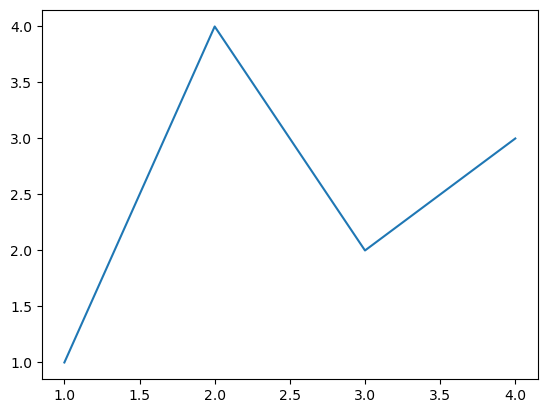

In [39]:
# Mengimport library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

---
Bagian-bagian dari plot matplotlib

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="matplotlib anatomy" style="width:500px;"/>

In [59]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

In [60]:
fig = plt.figure(figsize=(13,5))

<Figure size 1300x500 with 0 Axes>

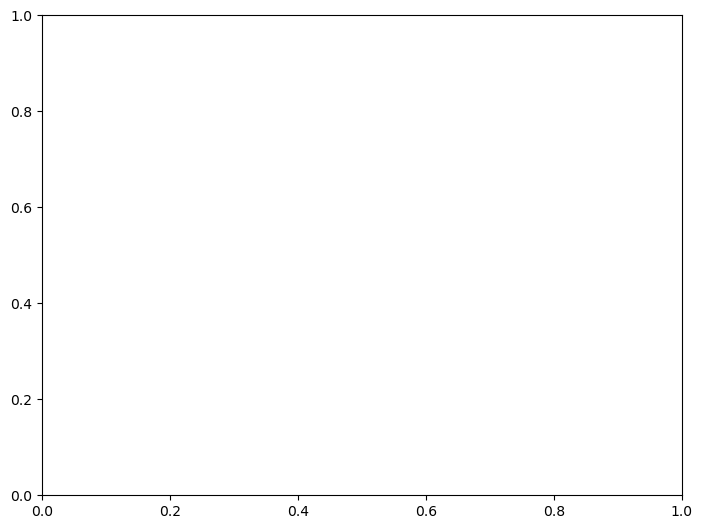

In [61]:
import numpy as np
np.linspace(0, 100, 11)
np.zeros((2, 1), int)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

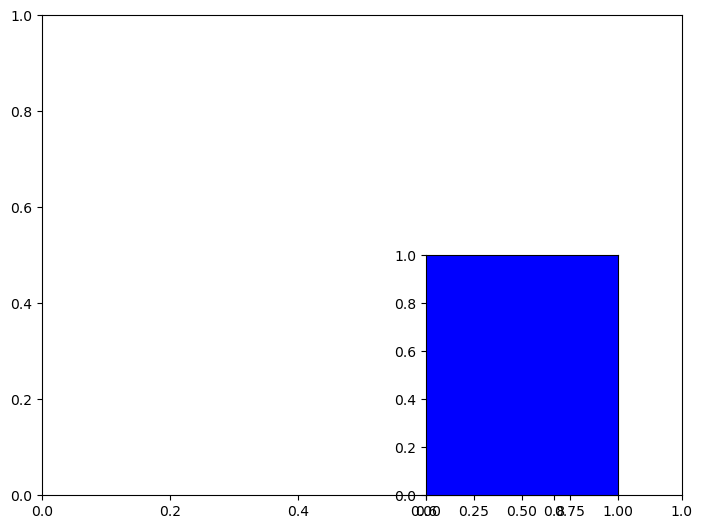

In [62]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.6,0,0.3,0.5], facecolor='b')

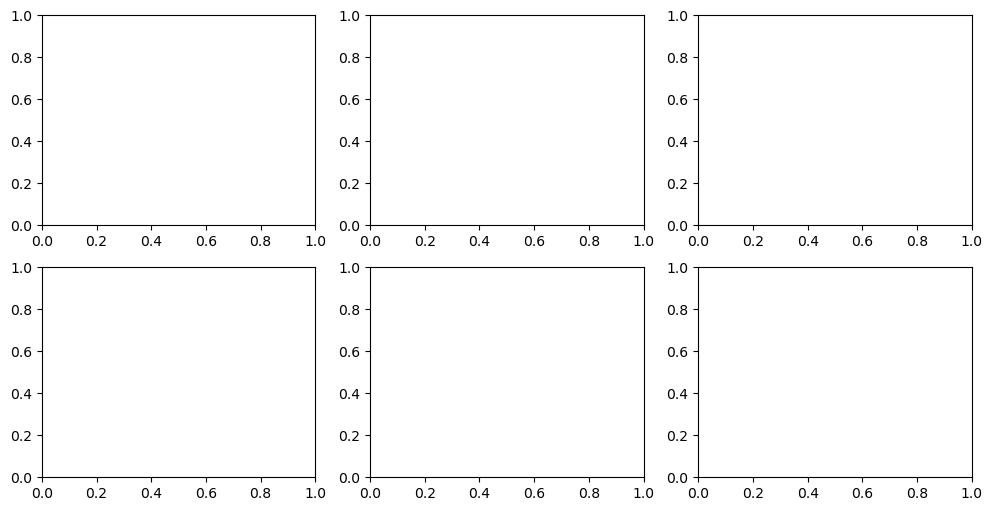

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

In [63]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(nrows=2, ncols=3)
plt.subplots?

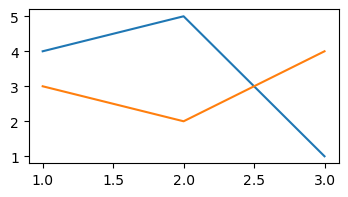

In [64]:
fig,ax = plt.subplots(figsize=(4,2))
ax.plot([1,2,3],[4,5,1])
ax.plot([1,2,3],[3,2,4])
plt.show()

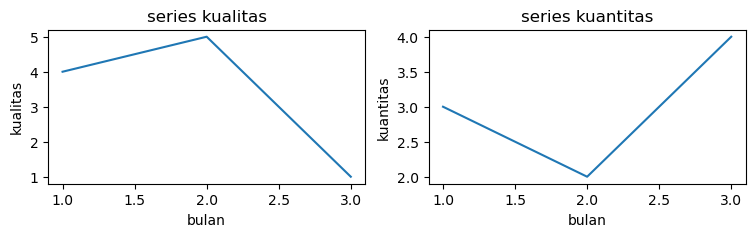

In [66]:
fig,ax = plt.subplots(figsize=(9,2),ncols=2)
ax0,ax1 = ax

ax0.plot([1,2,3],[4,5,1])
ax0.set_xlabel('bulan')
ax0.set_ylabel('kualitas')
ax0.set_title('series kualitas')

ax1.plot([1,2,3],[3,2,4])
ax1.set_xlabel('bulan')
ax1.set_ylabel('kuantitas')
ax1.set_title('series kuantitas')

plt.show()

Text(0, 0, 'the maximum')

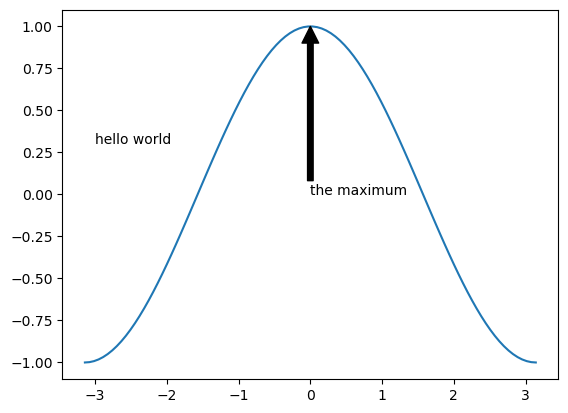

In [68]:
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
z = np.sin(6*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

## E. Tips

#### 1. Memanggil method yang tersimpan dalam library

Method dapat dipanggil dengan menambahkan `.` kemudian tab keyboard.

<div align="center"><img src="../img/1_method_call.png" alt="drawing" width="300"/><br>***</div>

In [ ]:
np.

#### 2. Mendapatkan bantuan

Bantuan menggunakan command `help` atau `?`.

In [31]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)

    Create an array.

    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        ``__array__`` method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array. If not given, NumPy will try to use
        a default ``dtype`` that can represent the values (by applying promotion
        rules when necessary.)
    copy : bool, optional
        If ``True`` (default), then the array data is copied. If ``None``,
        a copy will only be made if ``__array__`` returns a copy, if obj is
        a nested sequence, or if a copy is needed to satisfy any of the other
        requirements (``dtype``, ``order``, 

In [33]:
# atau menggunakan ?
np?

Type:        module
String form: <module 'numpy' from '/home/tyo/miniconda3/envs/ofs/lib/python3.13/site-packages/numpy/__init__.py'>
File:        ~/miniconda3/envs/ofs/lib/python3.13/site-packages/numpy/__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://numpy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as ``np``::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

 